In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
point = np.array([[0.4, 0.53], [0.15, 0.38], [0.40, 0.35], [0.26, 0.19], [0.08, 0.41], [0.45, 0.30]])

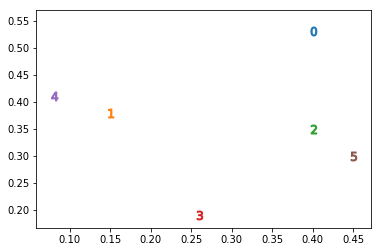

In [3]:
for i in range(len(point)):
    plt.scatter(point[i:i+1,0], point[i:i+1,1], marker="$"+str(i)+"$", s=80)
plt.show()

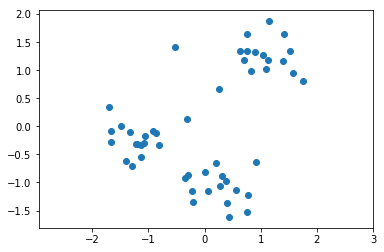

In [151]:
centers = [[5, 5], [-5, -10], [2, -20]]
X, labels_true = make_blobs(n_samples=50, centers=centers, cluster_std=3,
                            random_state=0)

X = StandardScaler().fit_transform(X)
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.show()

In [4]:
def make_array_single_dimension(l):
    l2 = []

    for x in l:
        if type(x).__name__ == "list":
            l2 += make_array_single_dimension(x)
        else:
            l2.append(x)

    return l2

In [61]:
def distance(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [80]:
def distance_cluster_min(points, c1, c2):
    distances = []
    if type(c1) == int:
        c1 = [c1]
    if type(c2) == int:
        c2 = [c2]
    c1 = make_array_single_dimension(c1)
    c2 = make_array_single_dimension(c2)
    for p1 in c1:
        for p2 in c2:
            distances.append(distance(points[p1], points[p2]))
    return min(distances)

In [65]:
def min_dist(points, clusters):
    minimum = float('inf')
    for p1 in range(1, len(clusters)):
        for p2 in range(p1):
            dist = distance_cluster_min(points, clusters[p1], clusters[p2])
            if  dist < minimum:
                min_p1 = p1
                min_p2 = p2
                minimum = dist
    return [min_p1, min_p2]

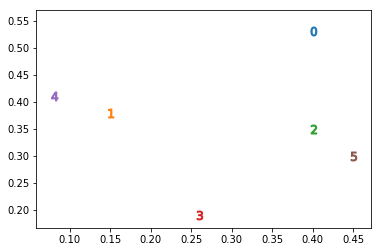

[0, 1, 3, 4, [5, 2]]
[0, 3, [5, 2], [4, 1]]
[3, [4, 1], [[5, 2], 0]]
[[4, 1], [[[5, 2], 0], 3]]
[[[[[5, 2], 0], 3], [4, 1]]]


In [111]:
for i in range(len(point)):
    plt.scatter(point[i:i+1,0], point[i:i+1,1], marker="$"+str(i)+"$", s=80)
plt.show()
cluster = list(range(point.shape[0]))
i = 0
while len(cluster) > 1:
    next_cluster = [cluster[i] for i in min_dist(point, cluster)]
    cluster.append(next_cluster)
    for p in next_cluster:
        cluster.remove(p)
    print(cluster)
    i += 1

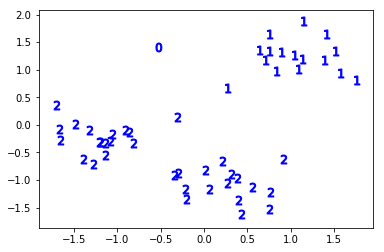

In [159]:
cluster = list(range(X.shape[0]))
i = 0
while len(cluster) > 3:
    next_cluster = [cluster[i] for i in min_dist(X, cluster)]
    cluster.append(next_cluster)
    for p in next_cluster:
        cluster.remove(p)
    i += 1
res = []
for c in cluster:
    if type(c) != list:
        c = [c]
    res.append(make_array_single_dimension(c))
for i in range(len(res)):
    for j in range(len(res[i])):
        x = res[i][j]
        plt.scatter(X[x:x+1,0], X[x:x+1,1], marker="$"+str(i)+"$", s=80, color="blue")
plt.show()

In [117]:
def distance_cluster_max(points, c1, c2):
    distances = []
    if type(c1) == int:
        c1 = [c1]
    if type(c2) == int:
        c2 = [c2]
    c1 = make_array_single_dimension(c1)
    c2 = make_array_single_dimension(c2)
    for p1 in c1:
        for p2 in c2:
            distances.append(distance(points[p1], points[p2]))
    return max(distances)

In [118]:
def max_dist(points, clusters):
    minimum = float('inf')
    for p1 in range(1, len(clusters)):
        for p2 in range(p1):
            dist = distance_cluster_max(points, clusters[p1], clusters[p2])
            if  dist < minimum:
                min_p1 = p1
                min_p2 = p2
                minimum = dist
    return [min_p1, min_p2]

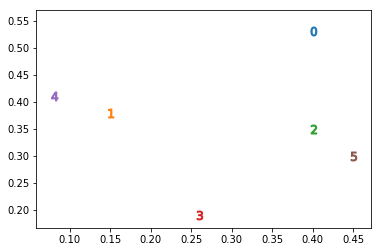

[0, 1, 3, 4, [5, 2]]
[0, 3, [5, 2], [4, 1]]
[0, [4, 1], [[5, 2], 3]]
[[[5, 2], 3], [[4, 1], 0]]
[[[[4, 1], 0], [[5, 2], 3]]]


In [119]:
for i in range(len(point)):
    plt.scatter(point[i:i+1,0], point[i:i+1,1], marker="$"+str(i)+"$", s=80)
plt.show()
cluster = list(range(point.shape[0]))
i = 0
while len(cluster) > 1:
    next_cluster = [cluster[i] for i in max_dist(point, cluster)]
    cluster.append(next_cluster)
    for p in next_cluster:
        cluster.remove(p)
    print(cluster)
    i += 1

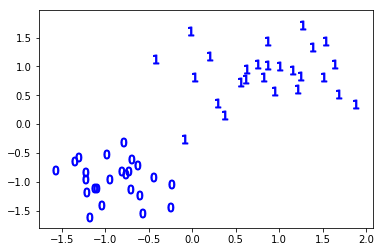

In [124]:
cluster = list(range(X.shape[0]))
i = 0
while len(cluster) > 2:
    next_cluster = [cluster[i] for i in max_dist(X, cluster)]
    cluster.append(next_cluster)
    for p in next_cluster:
        cluster.remove(p)
    i += 1
res = []
for c in cluster:
    res.append(make_array_single_dimension(c))
for i in range(len(res)):
    for j in range(len(res[i])):
        x = res[i][j]
        plt.scatter(X[x:x+1,0], X[x:x+1,1], marker="$"+str(i)+"$", s=80, color="blue")
plt.show()

In [130]:
def distance_cluster_avg(points, c1, c2):
    distances = []
    if type(c1) == int:
        c1 = [c1]
    if type(c2) == int:
        c2 = [c2]
    c1 = make_array_single_dimension(c1)
    c2 = make_array_single_dimension(c2)
    for p1 in c1:
        for p2 in c2:
            distances.append(distance(points[p1], points[p2]))
    return sum(distances)/len(distances)

In [131]:
def avg_dist(points, clusters):
    minimum = float('inf')
    for p1 in range(1, len(clusters)):
        for p2 in range(p1):
            dist = distance_cluster_avg(points, clusters[p1], clusters[p2])
            if  dist < minimum:
                min_p1 = p1
                min_p2 = p2
                minimum = dist
    return [min_p1, min_p2]

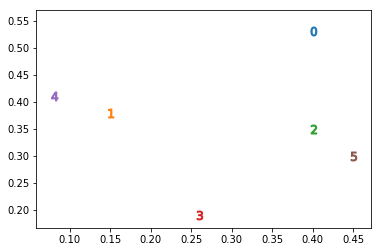

[0, 1, 3, 4, [5, 2]]
[0, 3, [5, 2], [4, 1]]
[3, [4, 1], [[5, 2], 0]]
[[[5, 2], 0], [[4, 1], 3]]
[[[[4, 1], 3], [[5, 2], 0]]]


In [132]:
for i in range(len(point)):
    plt.scatter(point[i:i+1,0], point[i:i+1,1], marker="$"+str(i)+"$", s=80)
plt.show()
cluster = list(range(point.shape[0]))
i = 0
while len(cluster) > 1:
    next_cluster = [cluster[i] for i in avg_dist(point, cluster)]
    cluster.append(next_cluster)
    for p in next_cluster:
        cluster.remove(p)
    print(cluster)
    i += 1

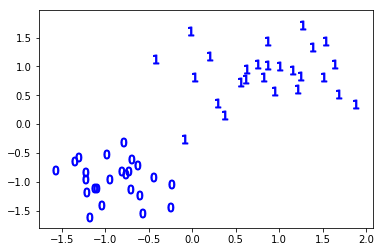

In [133]:
cluster = list(range(X.shape[0]))
i = 0
while len(cluster) > 2:
    next_cluster = [cluster[i] for i in avg_dist(X, cluster)]
    cluster.append(next_cluster)
    for p in next_cluster:
        cluster.remove(p)
    i += 1
res = []
for c in cluster:
    res.append(make_array_single_dimension(c))
for i in range(len(res)):
    for j in range(len(res[i])):
        x = res[i][j]
        plt.scatter(X[x:x+1,0], X[x:x+1,1], marker="$"+str(i)+"$", s=80, color="blue")
plt.show()

In [144]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [141]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
model.fit(X)
labels = model.labels_

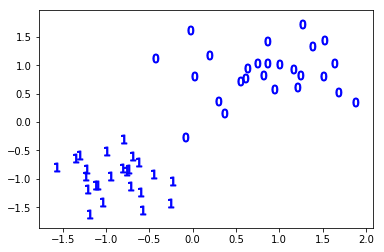

In [142]:
for i in range(len(labels)):
        plt.scatter(X[i:i+1,0], X[i:i+1,1], marker="$"+str(labels[i])+"$", c="blue", s=80)
plt.show()

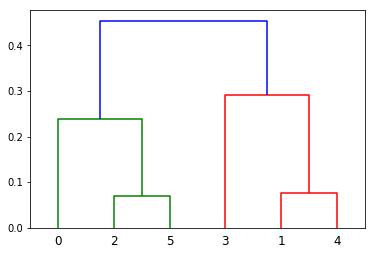

In [146]:
dendrogram = sch.dendrogram(sch.linkage(point, method='ward'))